In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains different aspects of farming like the weather, soil type, crop type etc. We can analyse what kind of conditions cause higher damage to crops and also prepare a predictive model to know if a particular case of crop would get damaged or not. We can also take preventive measures to ensure miinimun damage

# Features Description

In [2]:
df = pd.read_csv("train_agriculture.csv")
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
df.shape

(4599, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


Let's look at the distribution of features

In [5]:
df["ID"].value_counts()

F00001790    1
F00007719    1
F00000713    1
F00005267    1
F00003021    1
            ..
F00005670    1
F00006268    1
F00004316    1
F00003407    1
F00001254    1
Name: ID, Length: 4599, dtype: int64

ID column contaons unique ID for the Agriculture dataset and doesn't contain any useful info, so let's drop it

In [6]:
df.drop("ID",axis=1,inplace=True)
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


Text(0.5, 1.0, 'Estimated Insects Count per square metre - Distplot')

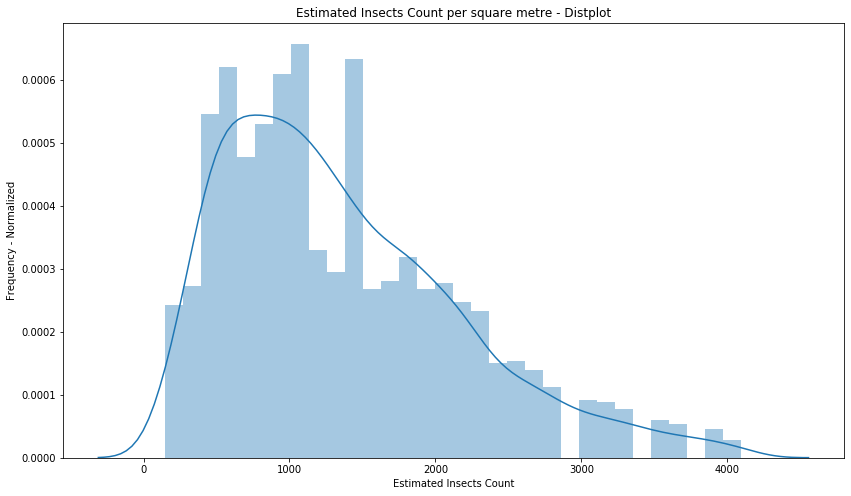

In [7]:
plt.figure(figsize=(14,8))
sns.distplot(df["Estimated_Insects_Count"])
#plt.xticks(rotation = 90)
plt.xlabel('Estimated Insects Count')
plt.ylabel('Frequency - Normalized')
plt.title('Estimated Insects Count per square metre - Distplot')

The distribution of Estimated Insects Count per square metre is skewed to the right

0    3565
1    1034
Name: Crop_Type, dtype: int64

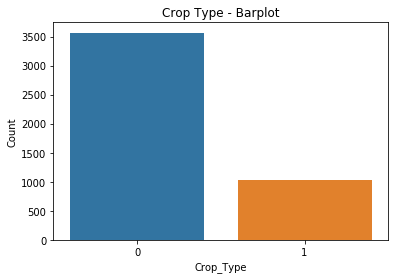

In [8]:
sns.countplot(df["Crop_Type"])
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.title('Crop Type - Barplot')
df["Crop_Type"].value_counts()

Most of the cases belong to crop 0 type

0    2407
1    2192
Name: Soil_Type, dtype: int64

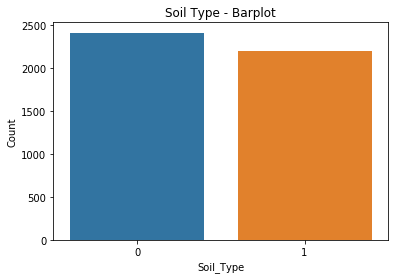

In [9]:
sns.countplot(df["Soil_Type"])
plt.xlabel('Soil_Type')
plt.ylabel('Count')
plt.title('Soil Type - Barplot')
df["Soil_Type"].value_counts()

The cases are almost evenly distributed between soil types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4157 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.5 KB


2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

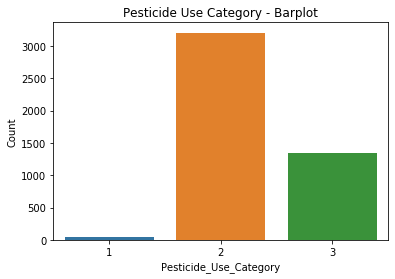

In [11]:
sns.countplot(df["Pesticide_Use_Category"])
plt.xlabel('Pesticide_Use_Category')
plt.ylabel('Count')
plt.title('Pesticide Use Category - Barplot')
df["Pesticide_Use_Category"].value_counts()

Very few cases have never used Pesticide (1) and in most cases Pesticides were used previously (2)

Text(0.5, 1.0, 'Number of pesticide Doses per Week - Distplot')

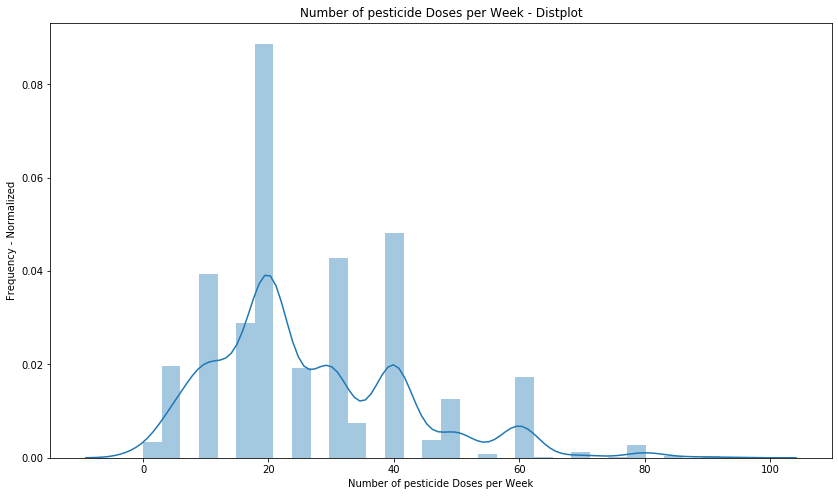

In [12]:
plt.figure(figsize=(14,8))
sns.distplot(df["Number_Doses_Week"])
#plt.xticks(rotation = 90)
plt.xlabel('Number of pesticide Doses per Week')
plt.ylabel('Frequency - Normalized')
plt.title('Number of pesticide Doses per Week - Distplot')

The distribution of Number of pesticide Doses per Week is skewed to the right

Text(0.5, 1.0, 'Number of Weeks Used - Distplot')

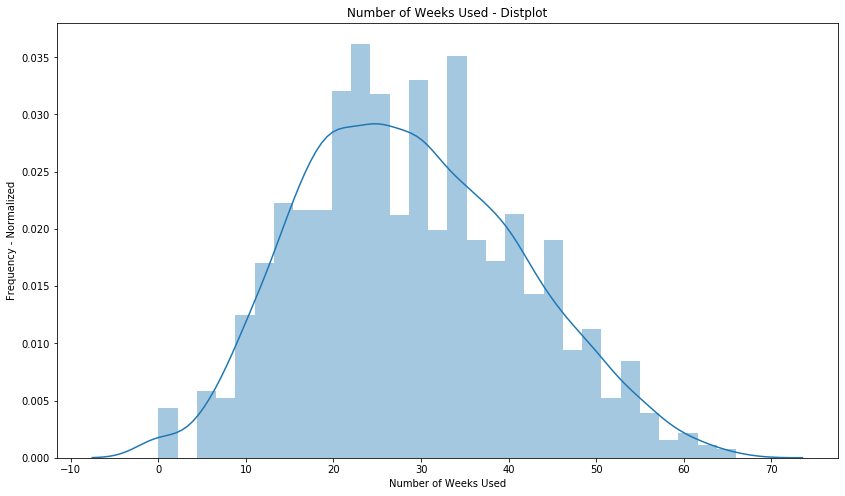

In [13]:
plt.figure(figsize=(14,8))
sns.distplot(df["Number_Weeks_Used"])
#plt.xticks(rotation = 90)
plt.xlabel('Number of Weeks Used')
plt.ylabel('Frequency - Normalized')
plt.title('Number of Weeks Used - Distplot')

The distribution of Number of Weeks Used is skewed to the right

Text(0.5, 1.0, 'Number of Weeks Quit - Distplot')

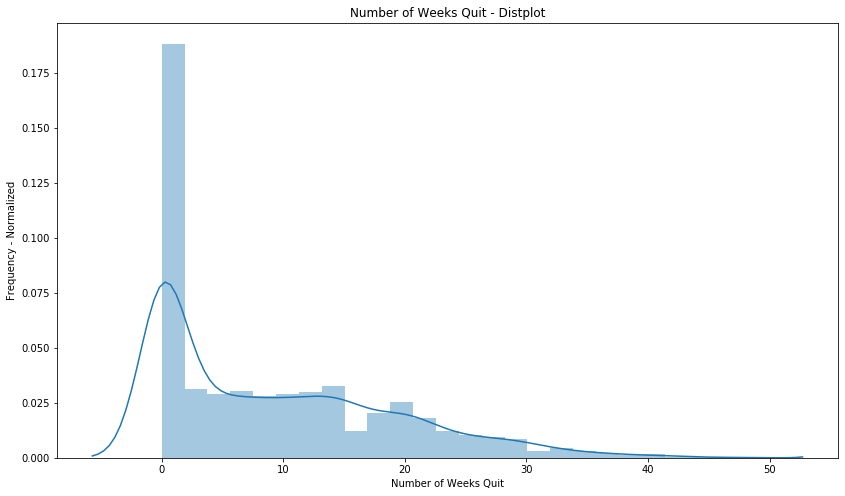

In [14]:
plt.figure(figsize=(14,8))
sns.distplot(df["Number_Weeks_Quit"])
#plt.xticks(rotation = 90)
plt.xlabel('Number of Weeks Quit')
plt.ylabel('Frequency - Normalized')
plt.title('Number of Weeks Quit - Distplot')

The distribution of Number of Weeks Quit is skewed to the right

2    2327
1    1379
3     893
Name: Season, dtype: int64

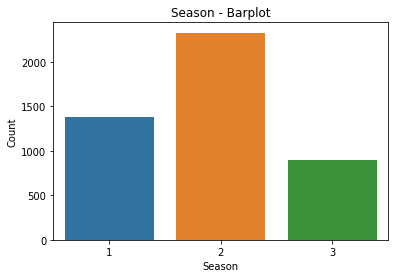

In [15]:
sns.countplot(df["Season"])
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Season - Barplot')
df["Season"].value_counts()

Most of the cases have season 2 category

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

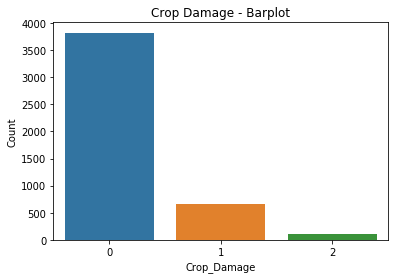

In [16]:
sns.countplot(df["Crop_Damage"])
plt.xlabel('Crop_Damage')
plt.ylabel('Count')
plt.title('Crop Damage - Barplot')
df["Crop_Damage"].value_counts()

0 - Alive, 1 - Damage due to other causes, 3 - Damage due to pesticides

There is a significant proportion of damage cases in the dataset using which we can predict damages and minimise them

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4157 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.5 KB


Bivariate Analysis

Text(0.5, 1.0, 'Season wise crop_damage - Barplot')

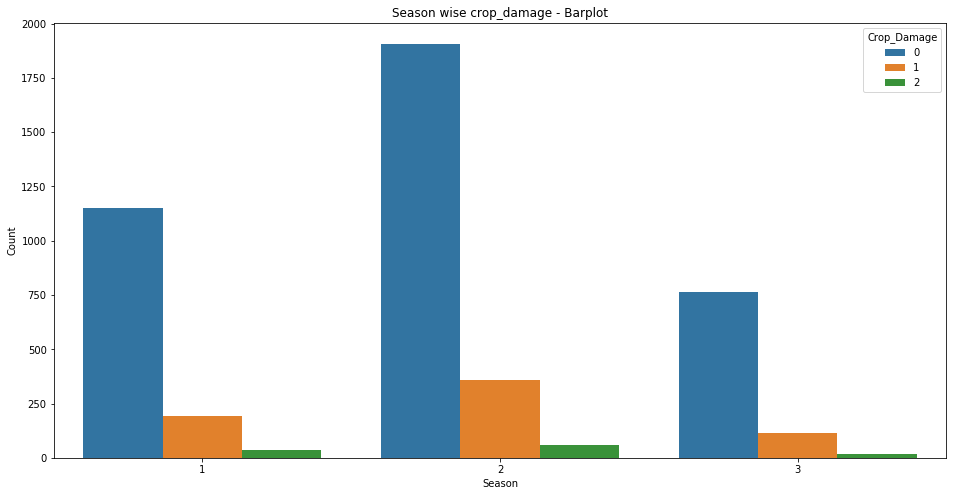

In [18]:
plt.figure(figsize=(16,8))
sns.countplot(x="Season",hue="Crop_Damage", data = df)
plt.ylabel('Count')
plt.title('Season wise crop_damage - Barplot')

Season 2 has the highest number of damage cases

Text(0.5, 1.0, 'Crop_Damage vs Number of Weeks Quit Boxplot')

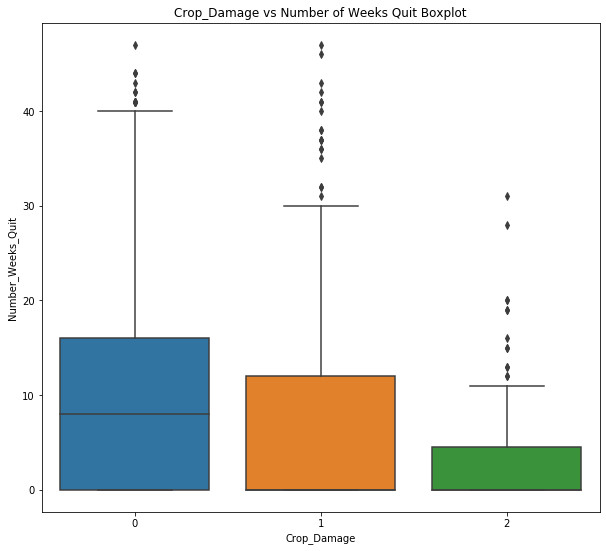

In [19]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Crop_Damage", y="Number_Weeks_Quit",data=df)
plt.title('Crop_Damage vs Number of Weeks Quit Boxplot')

The crops which were damaged had a very low value for Number of Weeks Quit

Text(0.5, 1.0, 'Crop_Damage vs Number of Weeks Used Boxplot')

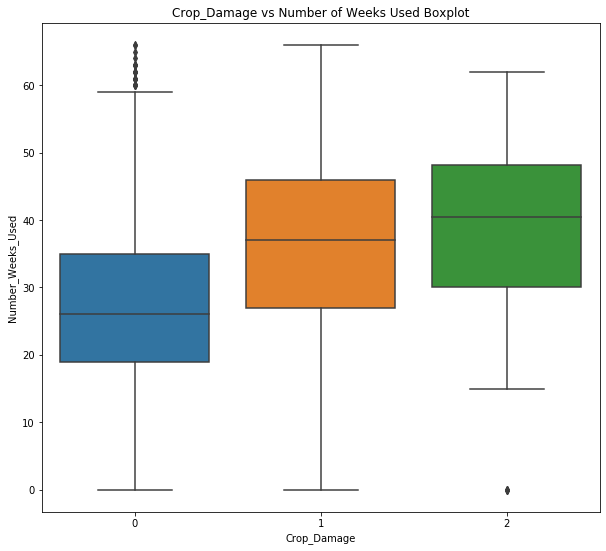

In [20]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Crop_Damage", y="Number_Weeks_Used",data=df)
plt.title('Crop_Damage vs Number of Weeks Used Boxplot')

The crops which were damaged had relatively higher value for Number of Weeks used

Text(0.5, 1.0, 'Crop_Damage vs Number of pesticide Doses per Week - Boxplot')

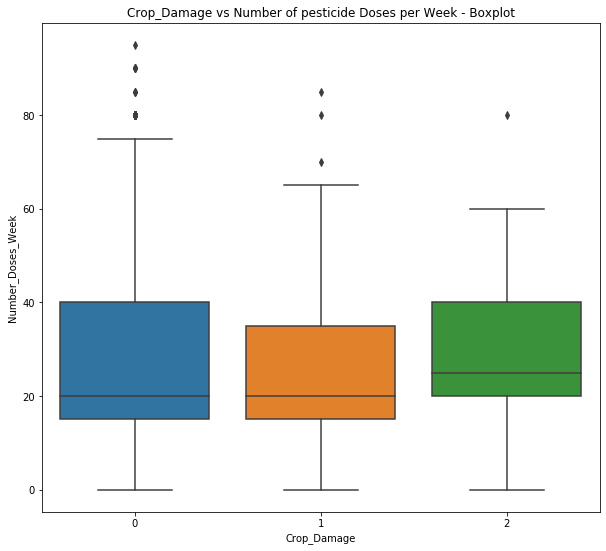

In [21]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Crop_Damage", y="Number_Doses_Week",data=df)
plt.title('Crop_Damage vs Number of pesticide Doses per Week - Boxplot')

Crops damaged due to pesticides had relative higher Number of pesticide Doses per Week

Text(0.5, 1.0, 'Crop_Damage as per Pesticide_Use_Category - Barplot')

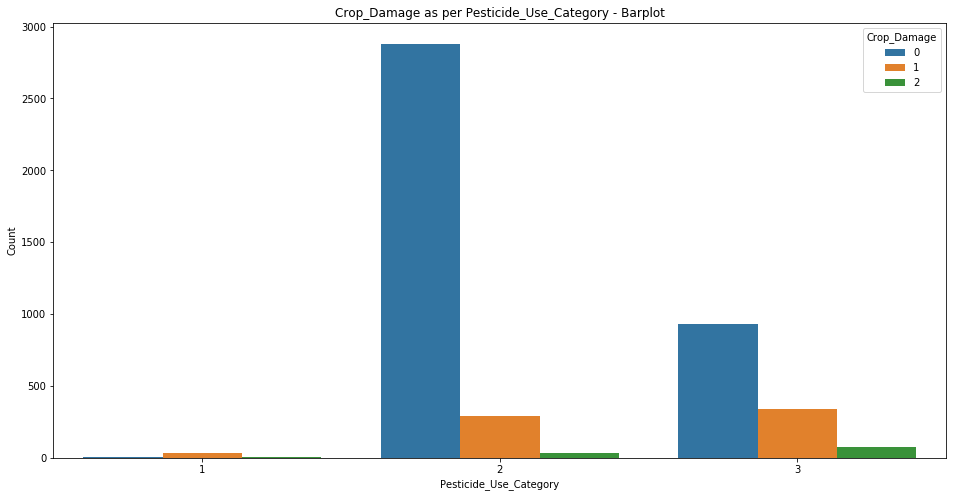

In [22]:
plt.figure(figsize=(16,8))
sns.countplot(x="Pesticide_Use_Category",hue="Crop_Damage", data = df)
plt.ylabel('Count')
plt.title('Crop_Damage as per Pesticide_Use_Category - Barplot')

Among the cases of crops damaged by pesticides, most of them have currently using pesticides category (3)

Text(0.5, 1.0, 'Crop_Damage as per Soil_Type - Barplot')

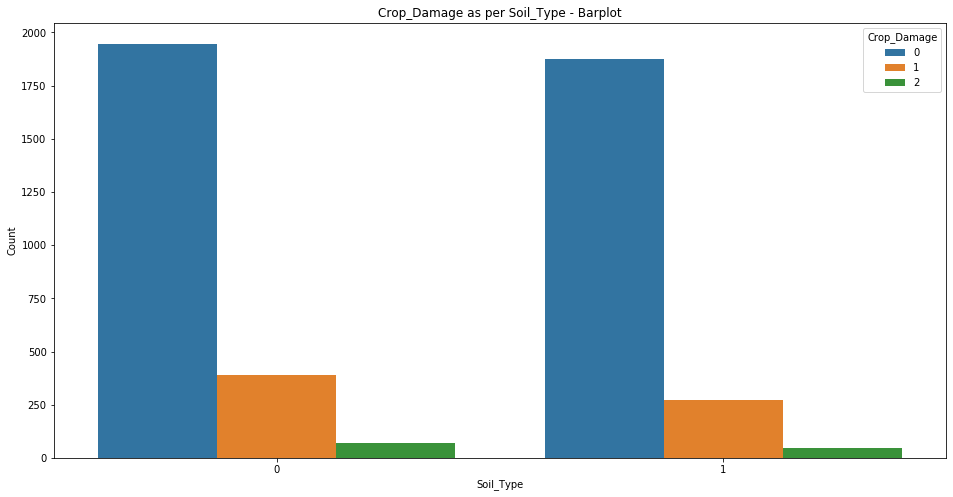

In [23]:
plt.figure(figsize=(16,8))
sns.countplot(x="Soil_Type",hue="Crop_Damage", data = df)
plt.ylabel('Count')
plt.title('Crop_Damage as per Soil_Type - Barplot')

Crop damage is relatively higher in soil type 0

Text(0.5, 1.0, 'Crop_Damage as per Crop_Type - Barplot')

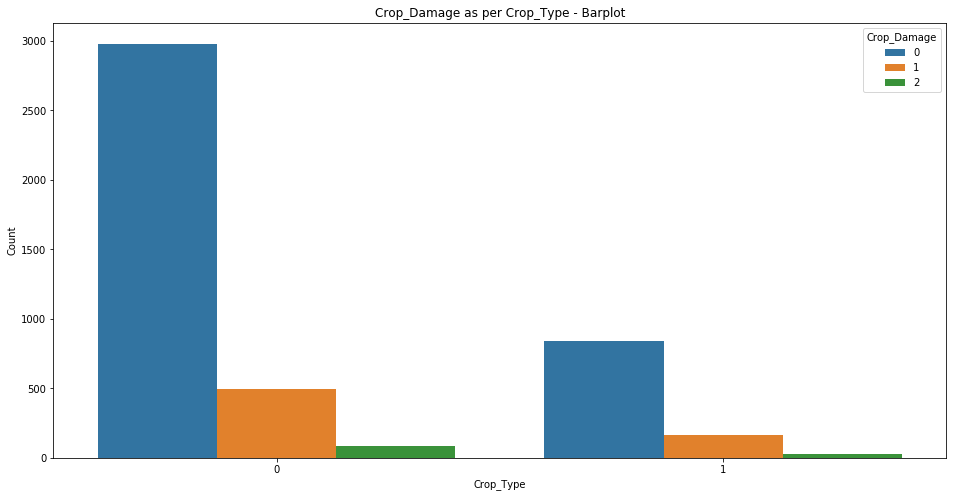

In [24]:
plt.figure(figsize=(16,8))
sns.countplot(x="Crop_Type",hue="Crop_Damage", data = df)
plt.ylabel('Count')
plt.title('Crop_Damage as per Crop_Type - Barplot')

Most of the damage cases belong to crop Type 0 in the dataset

Text(0.5, 1.0, 'Crop_Damage vs Estimated Insects Count per square metre - Boxplot')

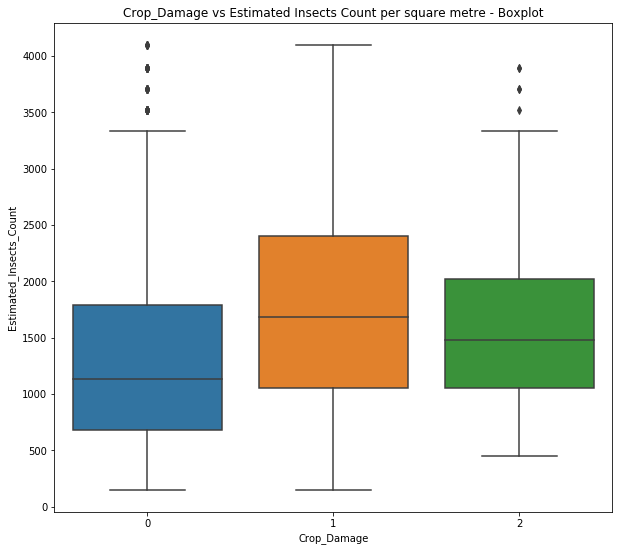

In [25]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Crop_Damage", y="Estimated_Insects_Count",data=df)
plt.title('Crop_Damage vs Estimated Insects Count per square metre - Boxplot')

The above plot shows that relatively higher density of insects causes damage to crops

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4157 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.5 KB


Text(0.5, 1.0, 'Soil_Type vs Estimated Insects Count per square metre - Boxplot')

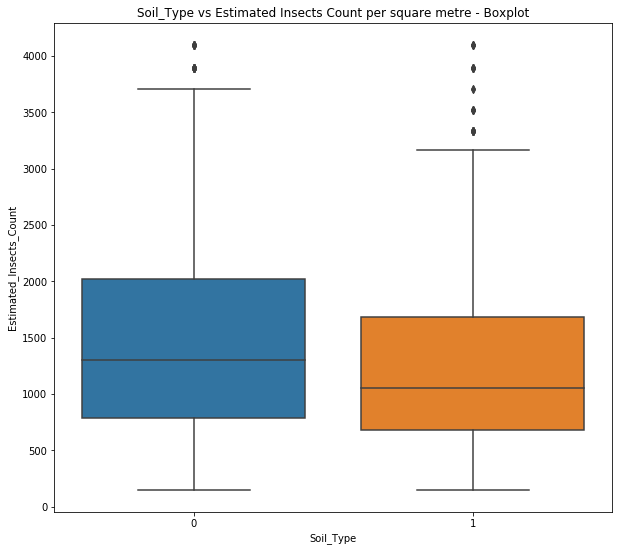

In [27]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Soil_Type", y="Estimated_Insects_Count",data=df)
plt.title('Soil_Type vs Estimated Insects Count per square metre - Boxplot')

Soil Type 0 have relatively higher insect density

In [30]:
#Let's look at the null values present in the dataset
df.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

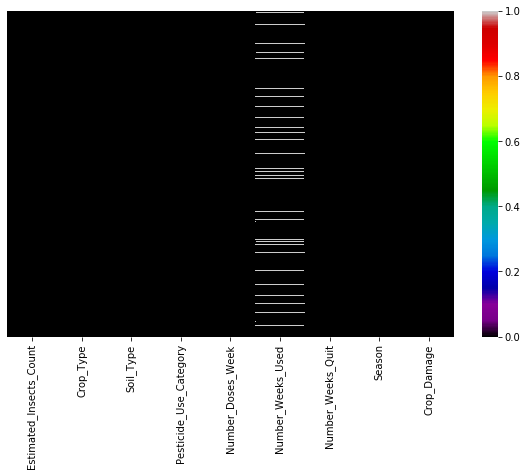

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cmap="nipy_spectral")

In [32]:
df.shape

(4599, 9)

In [33]:
# Let's drop the null value cases for the model
df.dropna(inplace=True)
df.shape

(4157, 9)

442 cases having null values have been deleted from the dataset

In [34]:
df["Crop_Damage"].value_counts()

0    3465
1     588
2     104
Name: Crop_Damage, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4157 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4157 non-null   int64  
 1   Crop_Type                4157 non-null   int64  
 2   Soil_Type                4157 non-null   int64  
 3   Pesticide_Use_Category   4157 non-null   int64  
 4   Number_Doses_Week        4157 non-null   int64  
 5   Number_Weeks_Used        4157 non-null   float64
 6   Number_Weeks_Quit        4157 non-null   int64  
 7   Season                   4157 non-null   int64  
 8   Crop_Damage              4157 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 324.8 KB


In [36]:
df.skew()

Estimated_Insects_Count    0.915308
Crop_Type                  1.314816
Soil_Type                  0.098785
Pesticide_Use_Category     0.689065
Number_Doses_Week          0.963165
Number_Weeks_Used          0.264944
Number_Weeks_Quit          0.916936
Season                     0.149567
Crop_Damage                2.340099
dtype: float64

Removing outliers from continuous features

In [37]:
from scipy.stats import zscore
z = np.abs(zscore(df[["Estimated_Insects_Count","Number_Doses_Week","Number_Weeks_Used","Number_Weeks_Quit"]]))
z

array([[1.44739987, 1.69515507, 2.29576449, 0.95293986],
       [1.42164731, 1.69515507, 2.29576449, 0.95293986],
       [1.3627843 , 1.69515507, 2.29576449, 0.95293986],
       ...,
       [1.10210394, 1.05616707, 1.73952427, 1.81560043],
       [1.10210394, 1.05616707, 0.70650671, 1.50798484],
       [1.10210394, 1.05616707, 0.32651085, 0.79021514]])

In [38]:
df_new = df[(z<3).all(axis=1)]
df_new.shape

(4052, 9)

In [39]:
df_new.skew()

Estimated_Insects_Count    0.792445
Crop_Type                  1.303590
Soil_Type                  0.090947
Pesticide_Use_Category     0.699880
Number_Doses_Week          0.716707
Number_Weeks_Used          0.271542
Number_Weeks_Quit          0.831867
Season                     0.149195
Crop_Damage                2.355510
dtype: float64

In [40]:
df_new.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [41]:
df_new["Crop_Damage"].value_counts()

0    3382
1     567
2     103
Name: Crop_Damage, dtype: int64

In [42]:
X=df_new.drop("Crop_Damage", axis=1)
y=df_new["Crop_Damage"]

Scaling the input data

In [43]:
#Scaling
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[-1.48921386,  1.84508748, -0.95557605, ..., -2.3070168 ,
        -0.96306807, -1.27946147],
       [-1.46197659,  1.84508748, -0.95557605, ..., -2.3070168 ,
        -0.96306807,  0.15387496],
       [-1.39971998,  1.84508748, -0.95557605, ..., -2.3070168 ,
        -0.96306807,  0.15387496],
       ...,
       [ 1.20727556, -0.54197972,  1.04648918, ..., -1.74850138,
         1.89975932,  0.15387496],
       [ 1.20727556, -0.54197972,  1.04648918, ..., -0.71125847,
         1.58166738,  0.15387496],
       [ 1.20727556, -0.54197972,  1.04648918, ...,  0.32598444,
         0.83945288,  0.15387496]])

Let's do Principal Component Analysis (PCA) for the input features

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X2)
X_pca = pca.transform(X2)
print("Original shape: {}".format(str(X2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (4052, 8)
Reduced shape: (4052, 6)


Text(0, 0.5, 'Principal components')

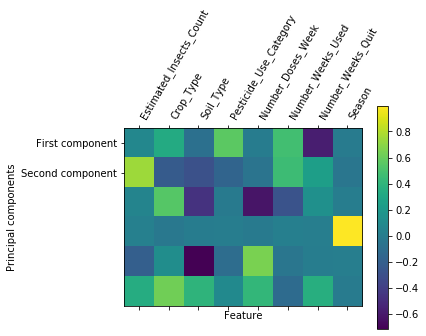

In [45]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X.columns)),
X.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Finding the best random state

In [46]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_accuracy_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=r_state)
    logr = LogisticRegression()
    logr.fit(X_train,y_train)
    y_pred = logr.predict(X_test)
    accu_scr = accuracy_score(y_test,y_pred)
    if accu_scr>max_accuracy_score:
        max_accuracy_score = accu_scr
        final_r_state = r_state
    
print("max accuracy score corresponding to random state",final_r_state,"is",max_accuracy_score)

max accuracy score corresponding to random state 67 is 0.8668310727496917


In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=67)

#scaled features or pca components don't give better performance than the original features

In [48]:
print(X_train.shape,"\n",X_test.shape)

(3241, 8) 
 (811, 8)


Observing performance of different classifier algorithms

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [50]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()#(n_neighbors=2)
GNB = GaussianNB()
#MNB = MultinomialNB()
SV = SVC()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()# From the GridSearchCV parameter tuning
ABC = AdaBoostClassifier()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingClassifier(learning_rate=0.04,n_estimators=100)#from the GridsearchCV performed later
XGB = xgb.XGBClassifier()

In [51]:
models = []
models.append(("LogisticRegression", LR))
models.append(("KNeighborsClassifier", KNN))
models.append(("GaussianNB", GNB))
#models.append(("MultinomialNB", MNB))
models.append(("SVC", SV))
models.append(("DecisionTreeClassifier", DTC))
models.append(("RandomForestClassifier", RFC))
models.append(("AdaBoostClassifier", ABC))
models.append(("GradientBoostingClassifier", GBC))
models.append(("XGBoostClassifier", XGB))

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=67, shuffle=True)

***************** LogisticRegression ******************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score =  0.8668310727496917


Cross val score =  0.8343967971259382


Classification Report
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       697
           1       0.73      0.08      0.15        98
           2       0.00      0.00      0.00        16

    accuracy                           0.87       811
   macro avg       0.53      0.36      0.36       811
weighted avg       0.83      0.87      0.82       811



Confusion Matrix 
[[695   2   0]
 [ 90   8   0]
 [ 15   1   0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** 

Cross val score =  0.8168762844225237


Classification Report
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       697
           1       0.30      0.18      0.23        98
           2       0.00      0.00      0.00        16

    accuracy                           0.83       811
   macro avg       0.39      0.38      0.38       811
weighted avg       0.79      0.83      0.81       811



Confusion Matrix 
[[658  37   2]
 [ 78  18   2]
 [ 11   5   0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





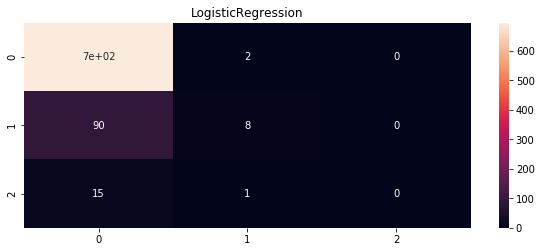

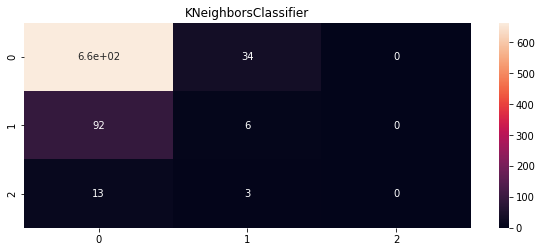

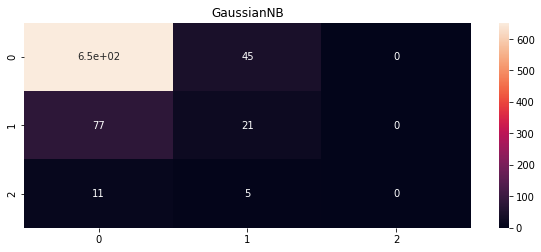

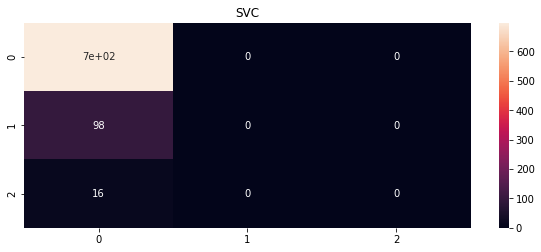

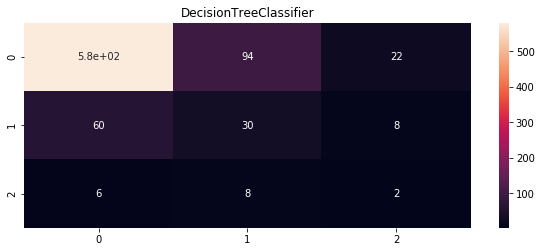

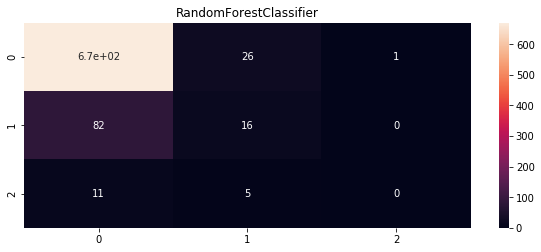

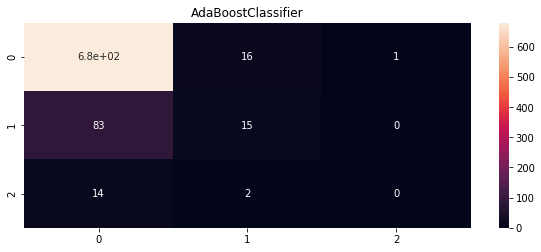

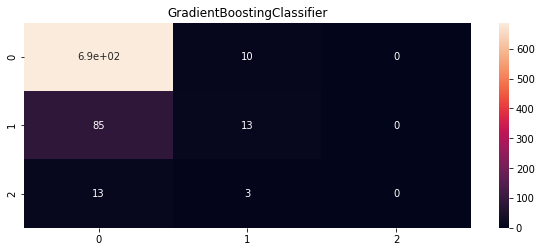

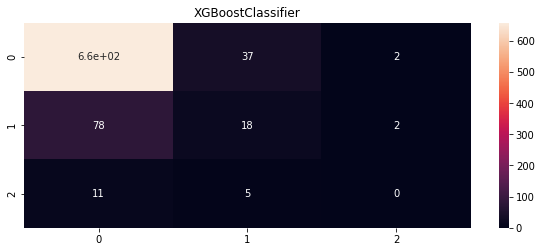

In [55]:
Model = []
score = []
cvs = []
#rocscore = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    AS = accuracy_score(y_test,pre)
    print("Accuracy Score = ",AS)
    score.append(AS*100)
    print("\n")
    sc = cross_val_score(model,X,y,cv=kf,scoring="accuracy").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    #roc_auc = auc( false_positive_rate, true_positive_rate)
    #print("roc_auc_score = ",roc_auc)
    #rocscore.append(roc_auc*100)
    #print("\n")
    print("Classification Report\n", classification_report(y_test,pre))
    print("\n")
    cm = confusion_matrix(y_test,pre)
    print("Confusion Matrix \n{}".format(cm))
    print("\n")
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    #plt.subplot(912)
    #plt.title(name)
    #plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    #plt.plot([0,1],[0,1],'r--')
    #plt.legend(loc = 'lower right')
    #plt.ylabel("True positive rate")
    #plt.xlabel("False positive rate")
    print("\n\n")

In [116]:
result = pd.DataFrame({"Model": Model, "Accuracy Socre": score, "Cross val score": cvs})
result

,Model,Accuracy Socre,Cross val score
0,LogisticRegression,86.683107,83.439680
1,KNeighborsClassifier,82.490752,81.737377
2,GaussianNB,82.983970,81.540028
3,SVC,85.943280,83.464645
4,DecisionTreeClassifier,75.709001,74.530788
5,RandomForestClassifier,84.217016,82.378865
6,AdaBoostClassifier,85.696671,83.415232
7,GradientBoostingClassifier,86.313194,83.760972
8,XGBoostClassifier,83.353884,81.687628


Gradient Boosting clsddifier has the best generalization performance, so let's find the best parameters for it

In [117]:
from sklearn.model_selection import GridSearchCV
parameters = {
                      'n_estimators': [70,100],
            'learning_rate': [0.04,0.05,0.06]
             }
grid = GridSearchCV(estimator=GBC,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.04,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
     

In [118]:
from sklearn.externals import joblib
joblib.dump(GBC,'Crop_Damage_Prediction.pkl')

['Crop_Damage_Prediction.pkl']

Let's load the test dataset and perdict crop damage

In [119]:
test = pd.read_csv("test_agriculture.csv")
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


Let us preprocess the test data as we processed the train dataset

In [120]:
test.drop("ID",axis=1,inplace=True)
test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,NaN,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


In [123]:
test.shape

(1199, 8)

In [124]:
#Checking for null values
test.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

Null values are present in the dataset, so let's get rid of them

In [125]:
test.dropna(inplace=True)
test.shape

(1080, 8)

In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  1199 non-null   int64  
 1   Crop_Type                1199 non-null   int64  
 2   Soil_Type                1199 non-null   int64  
 3   Pesticide_Use_Category   1199 non-null   int64  
 4   Number_Doses_Week        1199 non-null   int64  
 5   Number_Weeks_Used        1080 non-null   float64
 6   Number_Weeks_Quit        1199 non-null   int64  
 7   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 75.1 KB


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4157 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4157 non-null   int64  
 1   Crop_Type                4157 non-null   int64  
 2   Soil_Type                4157 non-null   int64  
 3   Pesticide_Use_Category   4157 non-null   int64  
 4   Number_Doses_Week        4157 non-null   int64  
 5   Number_Weeks_Used        4157 non-null   float64
 6   Number_Weeks_Quit        4157 non-null   int64  
 7   Season                   4157 non-null   int64  
 8   Crop_Damage              4157 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 324.8 KB


The columns in the test dataset match with the train dataset and is ready for prediction of Crop Damage

In [126]:
model = joblib.load("Crop_Damage_Prediction.pkl")
crop_damage = model.predict(test)
print(crop_damage)

[1 1 1 ... 0 0 0]


In [127]:
np.savetxt("crop_damage_prediction.csv", crop_damage, delimiter=",")